<a href="https://colab.research.google.com/github/olgOk/Adaptive_QNG/blob/main/Tutorial_on_QFI_in_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install -q qiskit

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 6.4 MB/s eta 0:00:00


In [ ]:
from qiskit.algorithms import gradients

import numpy as np

#Operator Imports
from qiskit.opflow import Z, X, I, StateFn, CircuitStateFn, SummedOp
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian

#Circuit imports
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter, ParameterVector, ParameterExpression
from qiskit.circuit.library import EfficientSU2

The QFI is available in different modules of Qiskit

1. In  ```qiskit.oplow ``` (https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/opflow/gradients/qfi.py)

2. ```qiskit.algorithms.gradients ``` (https://github.com/Qiskit/qiskit-terra/blob/9eb6c9bdeb07cdbbcfd549976ab79988980ad71b/qiskit/algorithms/gradients/qfi.py)


The version in Opflow module seems to be a high level wrapper on ```qiskit.algorithms.gradients.gfi``` implemented with  Qiskit primitives. 





# Example. Calculating QFI of an H molecule.

## Illustrative Example from the AQNGD Research Paper

As the QFI is calculated on the parametrized circuit, the expression for the Hamiltonian could be ommited. 

The following code demonstrates the calculation of the QFI for the two qubits parametrized circuit depicted below. 
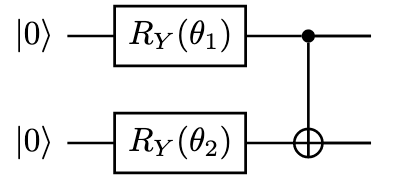


*Note:* The Fubini-Study metric is four times the QFI matrix.

The QFI class support the following pre-defined methods of calculation: ``'lin_comb_full'``, ``'overlap_diag'`` or ``'overlap_block_diag'``.

The proposed starting initial values of the parameters are $\theta_1 = -0.1$ and $\theta_2=-0.2$. 

In [ ]:
from qiskit.opflow import X, Z, I
from qiskit.circuit.library import RealAmplitudes

H_model = (0.4 * I ^ Z) + (0.4 * Z ^ I) + (0.2 * X ^ X)

In [ ]:
# constract the ansatz
theta1 = Parameter('theta1')
theta2 = Parameter('theta2')
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.ry(theta1, q[0])
qc.ry(theta2, q[1])
qc.cx(q[0],q[1])
params = [theta1, theta2]

op = ~StateFn(H_model) @ CircuitStateFn(primitive=qc, coeff=1.)

# define and compute the QFI
state = CircuitStateFn(primitive=qc, coeff=1.)
qfi = QFI(qfi_method='lin_comb_full').convert(operator=state, params=params)

values_dict = {theta1:-0.1, theta2:-0.2}

# Assign the parameters and evaluate the QFI
qfi_result = qfi.assign_parameters(values_dict).eval()
print('full QFI \n', 0.25*np.real(np.array(qfi_result)))

full QFI 
 [[0.25 0.  ]
 [0.   0.25]]
